# Vertex Formulas for a Quadratic Function

A quadratic function has the general form:

$$
f(x) = ax^2 + bx + c
$$

The coordinates of the vertex can be found directly without using derivatives:

$$x
_{\text{vertex}} = -\frac{b}{2a}
$$

$$
y_{\text{vertex}} = \frac{4ac - b^2}{4a}
$$

In [96]:
from functools import partial

import sympy as sp
import polars as pl
import numpy as np
import seaborn as sns

In [97]:
def quadratic(x: float, a: float, b: float, c: float) -> float:
    return (a * (x**2)) + (b * x) + c


aval, bval, cval = 4, -6, 42

In [98]:
func = partial(quadratic, a=aval, b=bval, c=cval)

In [99]:
X = np.linspace(-20, 20, dtype=np.float64())

In [100]:
df = pl.DataFrame({"x": X, "y": func(X)})

df

x,y
f64,f64
-20.0,1762.0
-19.183673,1629.155352
-18.367347,1501.641816
-17.55102,1379.459392
-16.734694,1262.60808
…,…
16.734694,1061.791753
17.55102,1168.847147
18.367347,1281.233653


<Axes: xlabel='x', ylabel='y'>

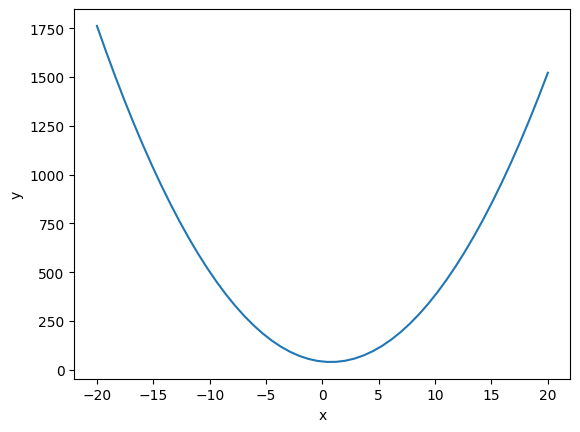

In [101]:
sns.lineplot(df, x="x", y="y")

In [102]:
x, a, b, c = sp.symbols("x,a,b,c")
f = sp.Function("f")(x)

expr = sp.Eq(f, (a * (x**2)) + (b * x) + (c))

expr

Eq(f(x), a*x**2 + b*x + c)

In [103]:
derivative1 = sp.diff(expr.rhs, x)
derivative1

2*a*x + b

In [104]:
d1_expr = sp.Eq(0, derivative1)
x_zero = sp.solve(d1_expr.subs({"a": aval, "b": bval}))
y_zero = list(map(func, x_zero))


for _x, _y in zip(x_zero, y_zero):
    print("(", _x, ",", _y, ")")

( 3/4 , 159/4 )


In [105]:
derivative2 = sp.diff(derivative1, x)

if derivative2.subs({"a": aval}) > 0:
    print("Is Minimum")
else:
    print("Is Maximum")

Is Minimum


In [ ]:
# These two formulas can directly find the Coordinates of the Vertex for a quadratic function without using Derivatives

x_vertex_formula = -b / (2 * a)
y_vertex_formula = (4 * a * c - (b**2)) / (4 * a)

(-b/(2*a), (4*a*c - b**2)/(4*a))

In [107]:
(
    x_vertex_formula.subs({"b": bval, "a": aval}),
    y_vertex_formula.subs({"b": bval, "a": aval, "c": cval}),
)

(3/4, 159/4)

# Solving a Quadratic Equation: Quadratic Formula and PQ-Formel

A quadratic equation has the general form:

$$
ax^2 + bx + c = 0
$$

The **Quadratic Formula** to find the solutions is:

$$
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
$$

---

In Germany, a slightly rearranged version called the **PQ-Formel** is often used.  
The quadratic equation is first rewritten in the form:

$$
x^2 + px + q = 0
$$

where:

- \( p = \frac{b}{a} \)
- \( q = \frac{c}{a} \)

Then the **PQ-Formel** gives the solutions as:

$$
x = -\frac{p}{2} \pm \sqrt{\left(\frac{p}{2}\right)^2 - q}
$$